In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

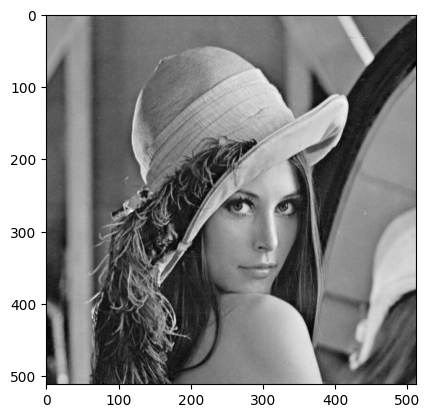

In [7]:
img = cv2.imread("D:\Programming\Computer Vision\Projects\Images\Lenna.png")
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = np.mean(img,axis=2)
plt.imshow(img_gray,"gray")

In [8]:
img_gray

array([[162.66666667, 162.66666667, 164.33333333, ..., 166.66666667,
        153.66666667, 129.66666667],
       [162.66666667, 162.66666667, 164.33333333, ..., 166.66666667,
        153.66666667, 129.66666667],
       [162.66666667, 162.66666667, 164.33333333, ..., 166.66666667,
        153.66666667, 129.66666667],
       ...,
       [ 54.        ,  54.        ,  59.        , ..., 110.        ,
        105.33333333, 106.        ],
       [ 53.66666667,  53.66666667,  63.33333333, ..., 109.33333333,
        111.        , 113.33333333],
       [ 53.66666667,  53.66666667,  63.33333333, ..., 109.33333333,
        111.        , 113.33333333]])

In [9]:
def convolution(image, kernel):
    # Phân tích thành phần màu của ảnh
    height, width = image.shape

    # Phân tích thành phần màu của kernel
    kernel_height, kernel_width = kernel.shape

    # Khởi tạo ma trận đầu ra
    output = np.zeros_like(image)

    # Đảo ngược kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Áp dụng bộ lọc
    for y in range(height - kernel_height + 1):
        for x in range(width - kernel_width + 1):
            output[y, x] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

In [10]:
def sobel_edge_detection(image):
    # Sobel kernels
    kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [-1, -2, -1]])
    kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Convolve image with Sobel kernels
    gradient_x = convolution(image, kernel_x)
    gradient_y = convolution(image, kernel_y)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

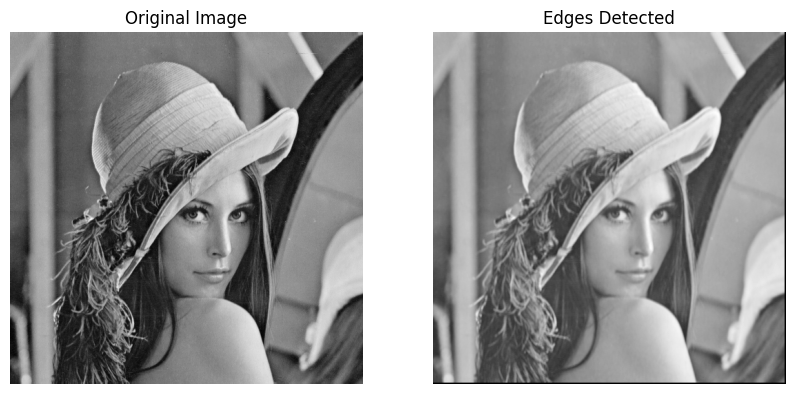

In [11]:
# Thực hiện edge detection
edge = sobel_edge_detection(img_gray)

# Hiển thị ảnh gốc và ảnh sau edge detection
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edge, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')

plt.show()

In [15]:
edges = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 7)

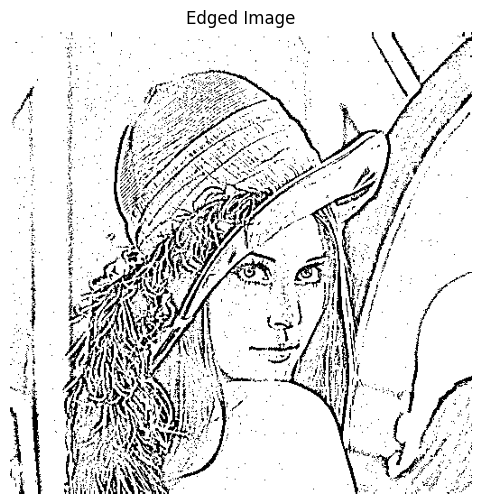

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(edges,cmap="gray")
plt.axis("off")
plt.title("Edged Image")
plt.show()